# stock-crawler

* Updated: 2024/08/05
* Objective: Retrieve historical stock price data from [TWSE](https://www.twse.com.tw/zh/trading/historical/stock-day-avg.html) and visualize it using a line chart.
* Required Packages: BeautifulSoup, Matplotlib, Pandas, Selenium, Time
* Development Environment: Google Colab

In [ ]:
!pip install selenium
!apt-get install chromium-driver

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time

class Stock:
    def __init__(self, *stock_numbers):
      self.stock_numbers = stock_numbers

    def web_driver():
    options = webdriver.ChromeOptions()
    options.add_argument("--verbose")
    options.add_argument('--no-sandbox')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    options.add_argument("--window-size=1920, 1200")
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver

    def daily(self, year, month):
      driver = web_driver()
      driver.get("https://www.twse.com.tw/zh/page/trading/exchange/STOCK_DAY_AVG.html")

      select_year = Select(driver.find_element(By.NAME, "yy"))
      select_year.select_by_value(year)

      select_month = Select(driver.find_element(By.NAME, "mm"))
      select_month.select_by_value(month)

      stockno = driver.find_element(By.NAME, "stockNo")

      out = []
      for stock_number in self.stock_numbers:
        stockno.clear()
        stockno.send_keys(stock_number)
        stockno.submit()

        time.sleep(5)
        soup = BeautifulSoup(driver.page_source, "lxml")
        table = soup.find('table')
        elements = table.find_all('td')
        data = (stock_number,) + tuple(element.getText() for element in elements)
        out.append(data)

      out = pd.DataFrame(out).T
      stockname = list(out.iloc[0,:])
      date1 = list(out.iloc[1:(len(out.index)-2):2,0])
      out1 = out.iloc[2:(len(out.index)-2):2,:]
      out1 = out1.apply(pd.to_numeric)
      out1.index = date1
      out1.columns = stockname
      return out1

In [ ]:
stock = Stock('2301', '2317', '3037')
result = stock.daily('2024', '7');result

,2301,2317,3037
113/07/01,110.5,216.0,179.5
113/07/02,110.0,204.5,178.5
113/07/03,108.0,203.0,183.0
113/07/04,111.5,214.5,181.5
113/07/05,107.0,214.5,178.5
113/07/08,107.5,226.5,181.0
113/07/09,107.0,225.5,177.0
113/07/10,109.0,223.5,175.5
113/07/11,109.5,225.5,189.5
113/07/12,109.0,216.0,190.0


<Axes: title={'center': 'Stock Price'}, xlabel='Date', ylabel='Price'>

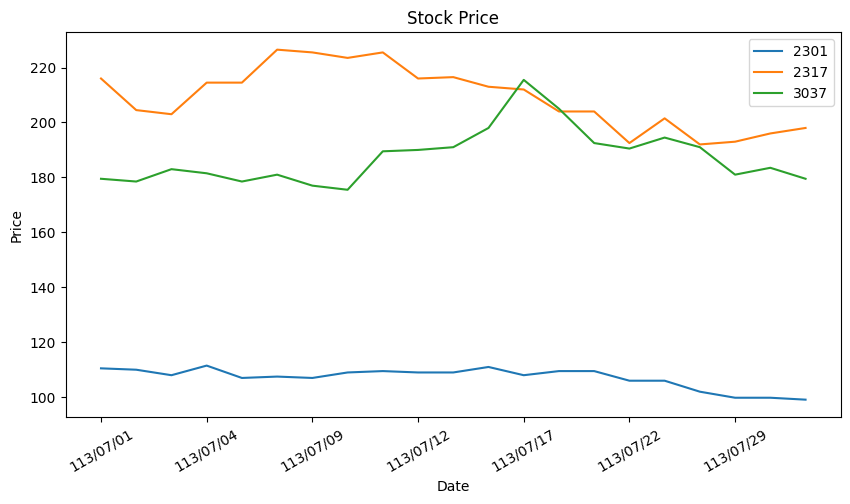

In [ ]:
import matplotlib.pyplot as plt
result.plot(xlabel = 'Date', ylabel = 'Price', title = 'Stock Price',figsize = (10,5),rot=30,xticks=range(0,len(result.index),3))